In [47]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten
from sklearn.preprocessing import OneHotEncoder
from keras.utils import to_categorical
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

In [36]:
# Reshaping test and validation images
train_generator = train_datagen.flow_from_directory(
    './Covid19-dataset/train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical')
validation_generator = test_datagen.flow_from_directory(
    './Covid19-dataset/test',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical')
test_generator = test_datagen.flow_from_directory(
    './Covid19-dataset/test',
    target_size = (224,224),
    batch_size = 32,
    class_mode = None,
    shuffle = False)

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [11]:
# Training model
model = Sequential()  # Creating a blank model
model.add(Conv2D(32,kernel_size=(3,3),activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))    # Reduce the overfitting

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())      # Input layer
model.add(Dense(64,activation='relu'))        # Hidden layer of ANN
model.add(Dropout(0.5))
model.add(Dense(3,activation='softmax'))      # Output layer

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=5,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps=1)

Epoch 1/20
5/5 [==============================] - 26s 5s/step - loss: 2.2398 - accuracy: 0.4258 - val_loss: 1.0942 - val_accuracy: 0.3438
Epoch 2/20
5/5 [==============================] - 22s 4s/step - loss: 1.0688 - accuracy: 0.4065 - val_loss: 1.0867 - val_accuracy: 0.5625
Epoch 3/20
5/5 [==============================] - 22s 4s/step - loss: 1.0512 - accuracy: 0.4688 - val_loss: 1.0791 - val_accuracy: 0.3438
Epoch 4/20
5/5 [==============================] - 22s 4s/step - loss: 0.9662 - accuracy: 0.5613 - val_loss: 1.0204 - val_accuracy: 0.5000
Epoch 5/20
5/5 [==============================] - 20s 4s/step - loss: 0.9437 - accuracy: 0.5806 - val_loss: 0.9384 - val_accuracy: 0.5625
Epoch 6/20
5/5 [==============================] - 21s 4s/step - loss: 0.8087 - accuracy: 0.6187 - val_loss: 0.7852 - val_accuracy: 0.7812
Epoch 7/20
5/5 [==============================] - 21s 4s/step - loss: 0.7819 - accuracy: 0.6516 - val_loss: 0.6852 - val_accuracy: 0.7500
Epoch 8/20
5/5 [==================

In [49]:
import os
from PIL import Image

root_dir = './Covid19-dataset/test'
# image_list = []
# for dirpath, dirnames, filenames in os.walk(root_dir):
#     for filename in filenames:
#         if filename.endswith(('.jpg', '.png', '.jpeg')):
#             image_path = os.path.join(dirpath, filename)
#             image = Image.open(image_path)
#             image_list.append(image)

# print(image_list)

In [50]:
import os

# Define the path to the test folder
root_dir = './Covid19-dataset/test'

# Initialize an empty list to store results
result = []

# Define labels for each folder
labels = {
    'Covid': 0,
    'Normal': 1,
    'Viral Pneumonia': 2
}

# Iterate over each folder in the test directory
for folder_name, label in labels.items():
    folder_path = os.path.join(root_dir, folder_name)
    
    # Count the number of images in the current folder
    image_count = len([img for img in os.listdir(folder_path) if img.endswith(('.png', '.jpg', '.jpeg'))])
    
    # Append the label for each image found in the folder
    result.extend([label] * image_count)

# Display the final result list
print(result)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [51]:
pred = model.predict(test_generator)

3/3 [==============================] - 4s 1s/step


In [52]:
print(type(pred))

<class 'numpy.ndarray'>


In [53]:
predicted = []

for row in pred:
    max_index = np.argmax(row)
    predicted.append(max_index)
print(predicted)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1]


In [54]:
print(accuracy_score(result, predicted))
print(confusion_matrix(result, predicted))

0.7121212121212122
[[23  2  1]
 [ 1  9 10]
 [ 0  5 15]]


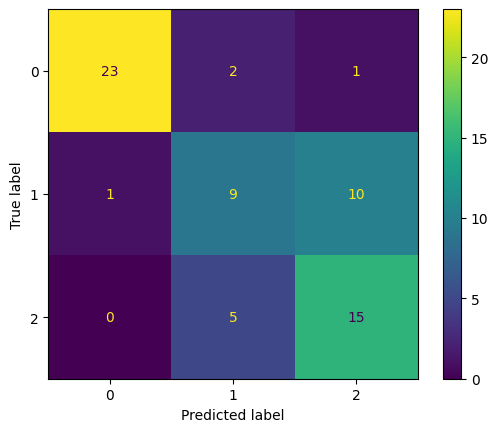

In [55]:
# Showing confusion matrix
# Display the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(result, predicted))
disp.plot()
plt.show()